Processing Chain https://dcase-repo.github.io/dcase_util/tutorial_processing_chain.html#processing-chain

In [1]:
import dcase_util as du
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import librosa
import librosa.display as disp

FeatureContainer :: Class
  Data
    data                            : matrix (40,501) 
    Dimensions
      time_axis                     : 1 
    Timing information
      time_resolution               : 0.02 sec
  Meta
    stats                           : Calculated 
    metadata                        : - 
    processing_chain                : - 
  Duration
    Frames                          : 501 
    Seconds                         : 10.02 sec
  Data
    Dimensions
      time_axis                     : 1 
      data_axis                     : 0 



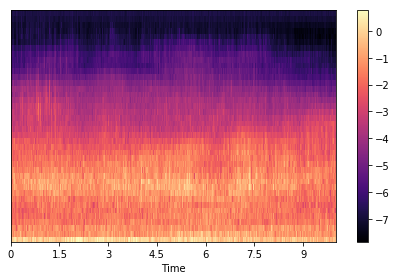

In [2]:
# Define processing chain
chain = du.processors.ProcessingChain([
    {
        'processor_name': 'MonoAudioReadingProcessor',
        'init_parameters': {
            'fs': 44100
        }
    },
    {
        'processor_name': 'MelExtractorProcessor'
    }
])
# Run the processing chain
data = chain.process(filename=du.utils.Example().audio_filename())
data.show()
# FeatureContainer :: Class
#   Data
#     data                            : matrix (40,501)
#     Dimensions
#       time_axis                     : 1
#     Timing information
#       time_resolution               : 0.02 sec
#   Meta
#     stats                           : Calculated
#     metadata                        : -
#     processing_chain                : -
#   Duration
#     Frames                          : 501
#     Seconds                         : 10.02 sec
#   Data
#     Dimensions
#       time_axis                     : 1
#       data_axis                     : 0
data.plot()

In [3]:
### Focusing on certain part of audio:

# Define processing chain
chain = du.processors.ProcessingChain([
    {
        'processor_name': 'MonoAudioReadingProcessor',
        'init_parameters': {
            'fs': 44100
        }
    },
    {
        'processor_name': 'MelExtractorProcessor'
    }
])
# Run the processing chain
data = chain.process(
    filename=du.utils.Example().audio_filename(),
    focus_start_seconds=1.0,
    focus_duration_seconds=2.0
)
print(data.shape)
# (40, 101)

# Run the processing chain
data = chain.process(
    filename=du.utils.Example().audio_filename(),
    focus_start_samples=44100,
    focus_stop_samples=44100+44100*2
)
print(data.shape)
# (40, 51)

(40, 101)
(40, 101)


mel
mfcc
mfcc_acceleration
mfcc_delta
FeatureContainer :: Class
  Data
    data                            : matrix (400,501) 
    Dimensions
      time_axis                     : 1 
    Timing information
      time_resolution               : 0.02 sec
  Meta
    stats                           : Calculated 
    metadata                        : - 
    processing_chain                : - 
  Duration
    Frames                          : 501 
    Seconds                         : 10.02 sec
  Data
    Dimensions
      time_axis                     : 1 
      data_axis                     : 0 



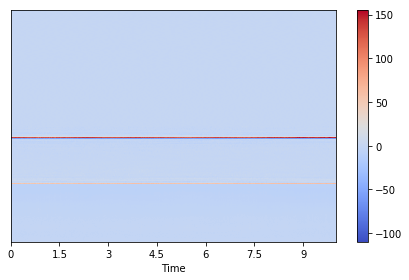

In [19]:
### Extracting a few different acoustic features for an audio file, and form data matrix:

# ['centroid', 'mel', 'mfcc', 'mfcc_acceleration', 'mfcc_delta', 'rmse', 'zcr']
# Define processing chain
n_mfcc = 100
chain = du.processors.ProcessingChain([
    {
        'processor_name': 'MonoAudioReadingProcessor',
        'init_parameters': {
            'fs': 44100
        }
    },
    {
        'processor_name': 'RepositoryFeatureExtractorProcessor',
        'init_parameters': {
            'parameters': {
                'mel': {'n_mels': 100},
                'mfcc': {'n_mfcc': n_mfcc},
                'mfcc_acceleration': {'n_mfcc': n_mfcc},
                'mfcc_delta': {'n_mfcc': n_mfcc}
            }
        }
    },
    {
        'processor_name': 'StackingProcessor',
        'init_parameters': {
            'recipe': 'mel;mfcc;mfcc_acceleration;mfcc_delta'
        }
    }
])
# Run the processing chain
data = chain.process(filename=du.utils.Example().audio_filename())
data.show()
data.plot()

mel
mfcc
DataMatrix3DContainer :: Class
  Data
    data                            : matrix (295,50,10) 
    Dimensions
      time_axis                     : 1 
    Timing information
      time_resolution               : None 
  Meta
    stats                           : Calculated 
    metadata                        : - 
    processing_chain                : - 
  Duration
    Frames                          : 50 
  Data
    Dimensions
      time_axis                     : 1 
      data_axis                     : 0 
      sequence_axis                 : 2 



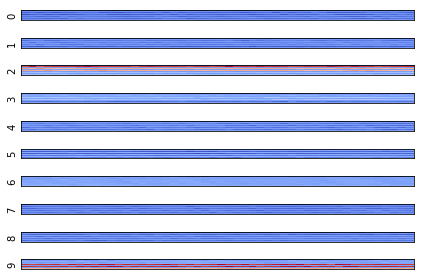

In [31]:
### Extracting a few different acoustic features for an audio file, normalize them,
### form data matrix, aggregate along time axis (context windowing), and split data into sequences:

# Normalization factors
mel_mean = np.array([
    -3.26094211, -4.20447522, -4.57860912, -5.11036974, -5.33019526,
    -5.48390484, -5.50473626, -5.54014946, -5.28249358, -5.12090705,
    -5.21508926, -5.3824216, -5.37758142, -5.38829567, -5.4912112,
    -5.55352419, -5.72801733, -6.02412347, -6.41367833, -6.64073975,
    -6.80493457, -6.8717373, -6.88140949, -6.91464104, -7.00929399,
    -7.13497673, -7.36417664, -7.73457445, -8.25007518, -8.79878143,
    -9.22709866, -9.28843908, -9.57054527, -9.82846299, -9.85425306,
    -9.90253041, -9.85194976, -9.62786338, -9.38480217, -9.18478766
])
mel_std = np.array([
    0.3450398, 0.47330394, 0.53112192, 0.57607313, 0.66710664,
    0.70052532, 0.79045046, 0.81864229, 0.79422025, 0.76691708,
    0.64798516, 0.59340713, 0.57756029, 0.64032687, 0.70226395,
    0.75670044, 0.80861907, 0.79305124, 0.7289238, 0.75346821,
    0.77785602, 0.7350573, 0.75137917, 0.77171676, 0.80314121,
    0.78965339, 0.79256442, 0.82524546, 0.84596991, 0.76430333,
    0.69690919, 0.69591269, 0.54718615, 0.5277196, 0.61271734,
    0.54482468, 0.42716334, 0.25561558, 0.08991936, 0.06402002
])

mfcc_mean = np.array([
    -1.89603847e+02, 4.88930395e+01, -8.37911555e+00,
    2.58522036e+00, 4.51964497e+00, -3.87312873e-01,
    8.97250541e+00, 1.61597737e+00, 1.74111135e+00,
    2.50223131e+00, 3.03385048e+00, 1.34561742e-01,
    1.04119803e+00, -2.57486399e-01, 7.58245525e-01,
    1.11375319e+00, 5.45536494e-01, 7.62699140e-01,
    9.34355519e-01, 1.57158221e-01
])
mfcc_std = np.array([
    15.94006483, 2.39593761, 4.78748908, 2.39555341,
    2.66573364, 1.75496556, 2.75005027, 1.5436589,
    1.81070379, 1.39476785, 1.22560606, 1.25575051,
    1.34613239, 1.46778281, 1.19398649, 1.1590474,
    1.1309816, 1.12975486, 0.95503429, 1.01747647
])

# Define processing chain
chain = du.processors.ProcessingChain([
    {
        'processor_name': 'MonoAudioReadingProcessor',
        'init_parameters': {
            'fs': 44100
        }
    },
    {
        'processor_name': 'RepositoryFeatureExtractorProcessor',
        'init_parameters': {
            'parameters': {
                'mel': {},
                'mfcc': {}
            }
        }
    },
    {
        'processor_name': 'RepositoryNormalizationProcessor',
        'init_parameters': {
            'parameters': {
                'mel': {
                    'mean': mel_mean,
                    'std': mel_std
                },
                'mfcc': {
                    'mean': mfcc_mean,
                    'std': mfcc_std
                }
            }
        }
    },
    {
        'processor_name': 'StackingProcessor',
        'init_parameters': {
            'recipe': 'mel;mfcc=1-19'
        }
    },
    {
        'processor_name': 'AggregationProcessor',
        'init_parameters': {
            'recipe': ['flatten'],
            'win_length_frames': 5,
            'hop_length_frames': 1,
        }
    },
    {
        'processor_name': 'SequencingProcessor',
        'init_parameters': {
            'sequence_length': 50
        }
    },
])
data = chain.process(filename=du.utils.Example().audio_filename())
data.show()
# DataMatrix3DContainer :: Class
#   Data
#     data                            : matrix (295,50,10)
#     Dimensions
#       time_axis                     : 1
#     Timing information
#       time_resolution               : None
#   Meta
#     stats                           : Calculated
#     metadata                        : -
#     processing_chain                : -
#   Duration
#     Frames                          : 50
#   Data
#     Dimensions
#       time_axis                     : 1
#       data_axis                     : 0
#       sequence_axis                 : 2
data.plot()


mel
mfcc
DataMatrix3DContainer :: Class
  Data
    data                            : matrix (10,295,50) 
    Dimensions
      time_axis                     : 2 
    Timing information
      time_resolution               : None 
  Meta
    stats                           : - 
    metadata                        : - 
    processing_chain                : - 
  Duration
    Frames                          : 50 
  Data
    Dimensions
      time_axis                     : 2 
      data_axis                     : 1 
      sequence_axis                 : 0 



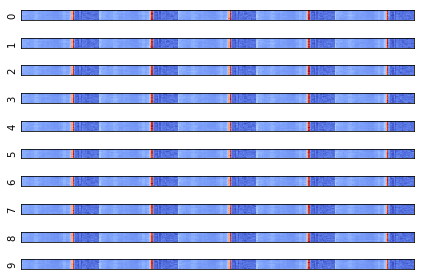

In [34]:
### Reshaping output matrix:

# Define processing chain
chain = du.processors.ProcessingChain([
    {
        'processor_name': 'MonoAudioReadingProcessor',
        'init_parameters': {
            'fs': 44100
        }
    },
    {
        'processor_name': 'RepositoryFeatureExtractorProcessor',
        'init_parameters': {
            'parameters': {
                'mel': {},
                'mfcc': {}
            }
        }
    },
    {
        'processor_name': 'RepositoryNormalizationProcessor',
        'init_parameters': {
            'parameters': {
                'mel': {
                    'mean': mel_mean,
                    'std': mel_std
                },
                'mfcc': {
                    'mean': mfcc_mean,
                    'std': mfcc_std
                }
            }
        }
    },
    {
        'processor_name': 'StackingProcessor',
        'init_parameters': {
            'recipe': 'mel;mfcc=1-19'
        }
    },
    {
        'processor_name': 'AggregationProcessor',
        'init_parameters': {
            'recipe': ['flatten'],
            'win_length_frames': 5,
            'hop_length_frames': 1,
        }
    },
    {
        'processor_name': 'SequencingProcessor',
        'init_parameters': {
            'sequence_length': 50
        }
    },
    {
        'processor_name': 'DataShapingProcessor',
        'init_parameters': {
            'axis_list': ['sequence', 'data', 'time'],
        }
    },
])
data = chain.process(filename=du.utils.Example().audio_filename())
data.show()
# DataMatrix3DContainer :: Class
#   Data
#     data                            : matrix (10,295,50)
#     Dimensions
#       time_axis                     : 2
#     Timing information
#       time_resolution               : None
#   Meta
#     stats                           : -
#     metadata                        : -
#     processing_chain                : -
#   Duration
#     Frames                          : 20
#   Data
#     Dimensions
#       time_axis                     : 2
#       data_axis                     : 1
#       sequence_axis                 : 0
data.plot()

DataMatrix4DContainer :: Class
  Data
    data                            : matrix (40,100,5,2) 
    Dimensions
      time_axis                     : 1 
    Timing information
      time_resolution               : None 
  Meta
    stats                           : Calculated 
    metadata                        : - 
    processing_chain                : - 
  Duration
    Frames                          : 100 
  Data
    Dimensions
      time_axis                     : 1 
      data_axis                     : 0 
      sequence_axis                 : 2 
  Data
    Dimensions
      time_axis                     : 1 
      data_axis                     : 0 
      sequence_axis                 : 2 
      channel_axis                  : 3 



E:\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


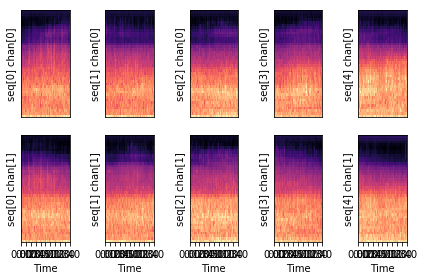

In [35]:
### Handling multi-channel audio and output data in 4D matrix:

# Define processing chain
chain = du.processors.ProcessingChain([
    {
        'processor_name': 'AudioReadingProcessor',
        'init_parameters': {
            'fs': 44100
        }
    },
    {
        'processor_name': 'RepositoryFeatureExtractorProcessor',
        'init_parameters': {
            'parameters': {
                'mel': {}
            }
        }
    },
    {
        'processor_name': 'RepositorySequencingProcessor',
        'init_parameters': {
            'sequence_length': 100
        }
    },
    {
        'processor_name': 'RepositoryToMatrixProcessor',
        'init_parameters': {
            'label': 'mel',
            'expanded_dimension': 'last'
        }
    },
])
# Run the processing chain
data = chain.process(filename=du.utils.Example().audio_filename())
data.show()
data.plot()
# DataMatrix4DContainer :: Class
#   Data
#     data                            : matrix (40,100,5,2)
#     Dimensions
#       time_axis                     : 1
#     Timing information
#       time_resolution               : None
#   Meta
#     stats                           : Calculated
#     metadata                        : -
#     processing_chain                : -
#   Duration
#     Frames                          : 20
#   Data
#     Dimensions
#       time_axis                     : 1
#       data_axis                     : 0
#       sequence_axis                 : 2
#   Data
#     Dimensions
#       time_axis                     : 1
#       data_axis                     : 0
#       sequence_axis                 : 2
#       channel_axis                  : 3

Meta data processing file:///E:/zanco/GitHub/dcase_util/docs/tutorial_processing_chain.html#meta-data-processing

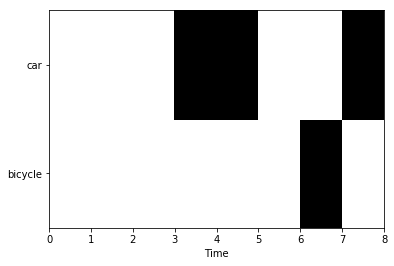

In [41]:
### Getting event roll:

import tempfile
tmp = tempfile.NamedTemporaryFile('r+', suffix='.txt', delete=False)
du.utils.Example.event_metadata_container().save(filename=tmp.name)

# Define processing chain
chain = du.processors.ProcessingChain([
    {
        'processor_name': 'MetadataReadingProcessor',
        'init_parameters': {}
    },
    {
        'processor_name': 'EventRollEncodingProcessor',
        'init_parameters': {
            'label_list': du.utils.Example.event_metadata_container().unique_event_labels,
            'time_resolution': 0.02,
        }
    }
])

# Do the processing
data = chain.process(
    filename=tmp.name,
    focus_filename='test1.wav'
)

# Plot data
data.plot()

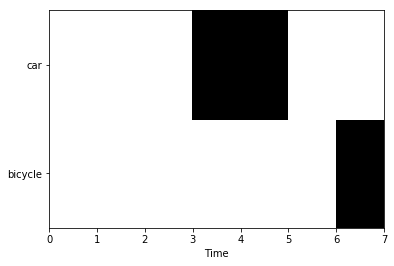

In [42]:
### Getting event roll for focus segment:

# Do the processing
data = chain.process(
    filename=tmp.name,
    focus_filename='test1.wav',
    focus_start_seconds=2.0,
    focus_stop_seconds=6.5,
)

# Plot data
data.plot()